In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from matplotlib.pylab import rcParams

## Monthly Time Series

In [72]:
rcParams['figure.figsize'] = 15, 6

In [73]:
data1 = pd.read_csv("vento_mensal.csv")
data1['Date'] = pd.to_datetime(data1['Date'], format = '%Y-%m-%d')
data1.head()

,Date,VelocidadeVentoMedia
0,2000-01-31,4.084946
1,2000-02-29,3.640230
2,2000-03-31,4.284946
3,2000-04-30,3.707778
4,2000-05-31,4.151613


In [74]:
X1 = np.arange(len(data1))
y1 = pd.Series(data1.VelocidadeVentoMedia.values)

Text(0,0.5,'Wind Speed (mps)')

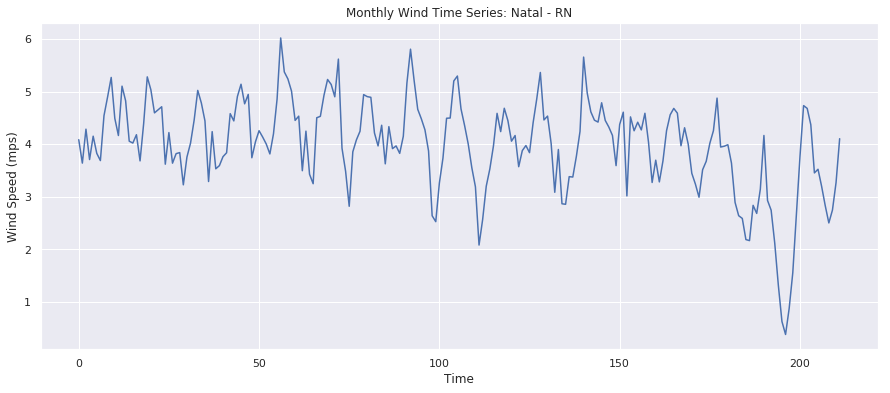

In [75]:
plt.plot(X1, y1)
plt.title('Monthly Wind Time Series: Natal - RN')
plt.xlabel('Time')
plt.ylabel('Wind Speed (mps)')

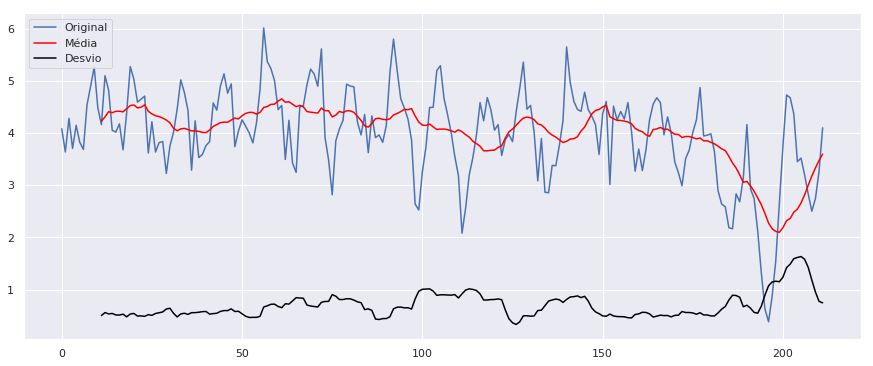

In [76]:
m_m1 = y1.rolling(window=12).mean()
m_std1 = y1.rolling(window=12).std() 

orig1 = plt.plot(y1,label='Original')
mean1 = plt.plot(m_m1, color='red',label='Média')
std1 = plt.plot(m_std1, color='black',label='Desvio')
plt.legend(loc='upper left')
plt.show()

### Trend estimation

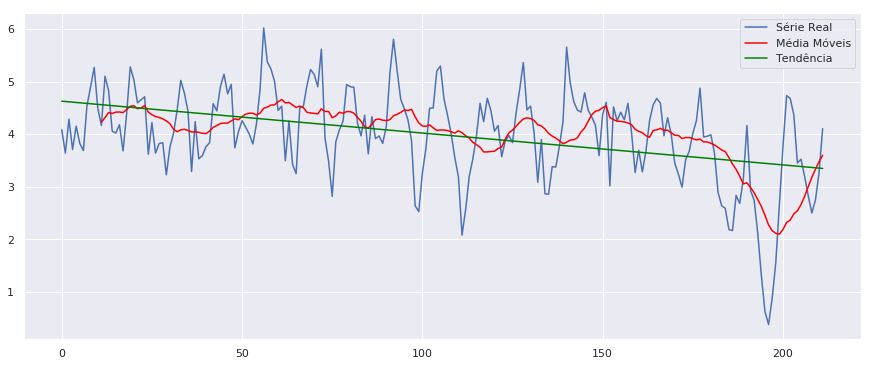

In [77]:
X1 = [i for i in range(0, len(y1))]
X1 = np.reshape(X1, (len(X1), 1))
modelo1 = LinearRegression()
modelo1.fit(X1, y1)

tendencia1 = modelo1.predict(X1)

rolling1 = y1.rolling(window=12)
media_mov1 = rolling1.mean()
plt.plot(y1, label='Série Real')
plt.plot(media_mov1,color='red', label='Média Móveis')
plt.plot(tendencia1,color='green', label='Tendência' )
plt.legend(loc='best')
plt.show()

### Trend elimination

In [78]:
serie_sem_tendencia1 = y1 - tendencia1

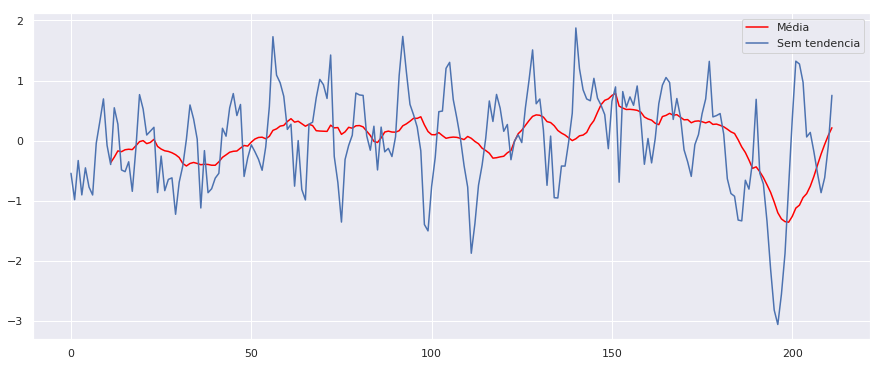

In [79]:
m_m1 = serie_sem_tendencia1.rolling(window=12).mean()
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.plot(serie_sem_tendencia1, label='Sem tendencia')
plt.legend(loc='best')
plt.show()

### Sazonality estimation

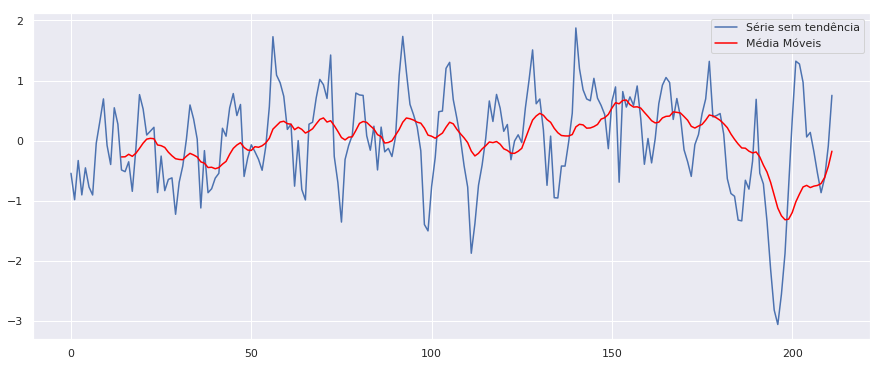

In [80]:
#Aplica média móveis na série sem a tendência 
rolling1 = serie_sem_tendencia1.rolling(window=15)
saz_mean_mov1 = rolling1.mean()
# plot original and transformed dataset
plt.plot(serie_sem_tendencia1, label='Série sem tendência')
plt.plot(saz_mean_mov1,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Sazonality elimination

In [81]:
serie_residuo1 = serie_sem_tendencia1 - saz_mean_mov1 #Elimina o componente de sazonalidade

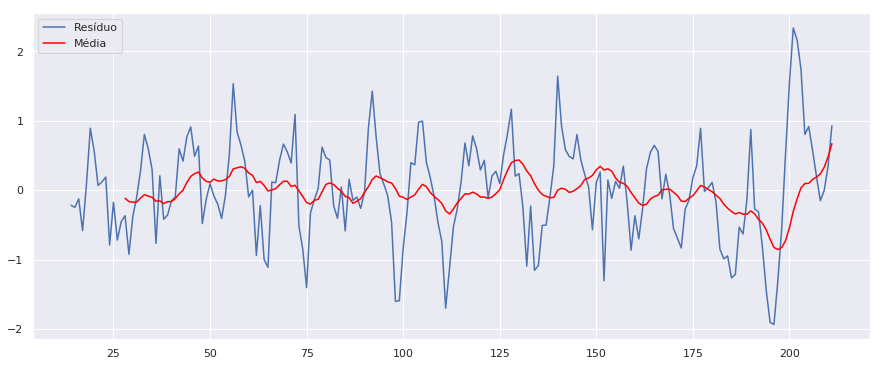

In [82]:
m_m1 = serie_residuo1.rolling(window=15).mean()
plt.plot(serie_residuo1, label='Resíduo')
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.legend(loc='best')
plt.show()

In [86]:
desvio1 = serie_residuo1.var()**0.5
random_normal1 = [i for i in np.random.normal(scale=desvio1, size = len(serie_residuo1))]

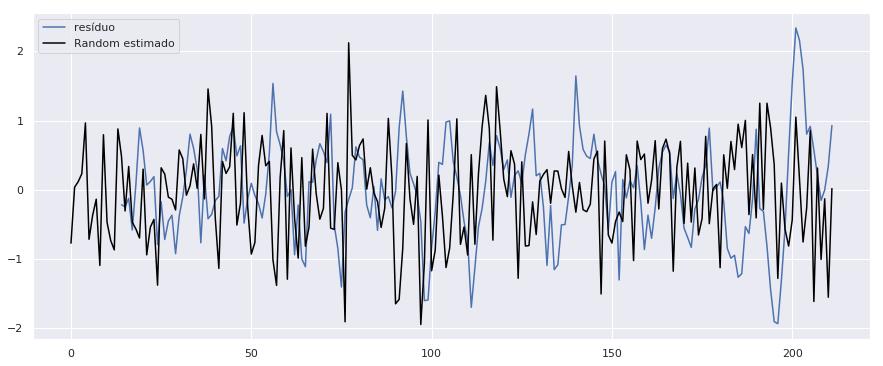

In [93]:
plt.plot(serie_residuo1.values, label='resíduo')
plt.plot(random_normal1, color='black',label='Random estimado')
plt.legend(loc='best')
plt.show()

## Daily Time Series

In [20]:
rcParams['figure.figsize'] = 20, 6

In [57]:
data2 = pd.read_csv("vento_diario.csv")
data2['Data'] = pd.to_datetime(data2['Data'], format = '%Y-%m-%d')
data2.head()

,Data,VelocidadeMediaVento
0,2013-01-01,5.433333
1,2013-01-02,5.400000
2,2013-01-03,4.100000
3,2013-01-04,4.433333
4,2013-01-05,4.966667


In [58]:
X2 = np.arange(len(data2.iloc[365:]))
y2 = pd.Series(data2.iloc[365:, 1].values)

Text(0,0.5,'Wind Speed (mps)')

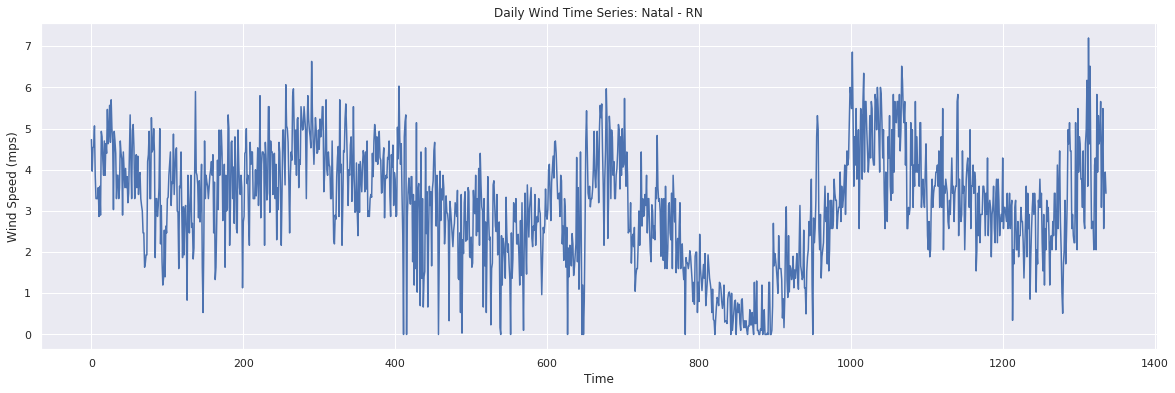

In [59]:
plt.plot(X2, y2)
plt.title('Daily Wind Time Series: Natal - RN')
plt.xlabel('Time')
plt.ylabel('Wind Speed (mps)')

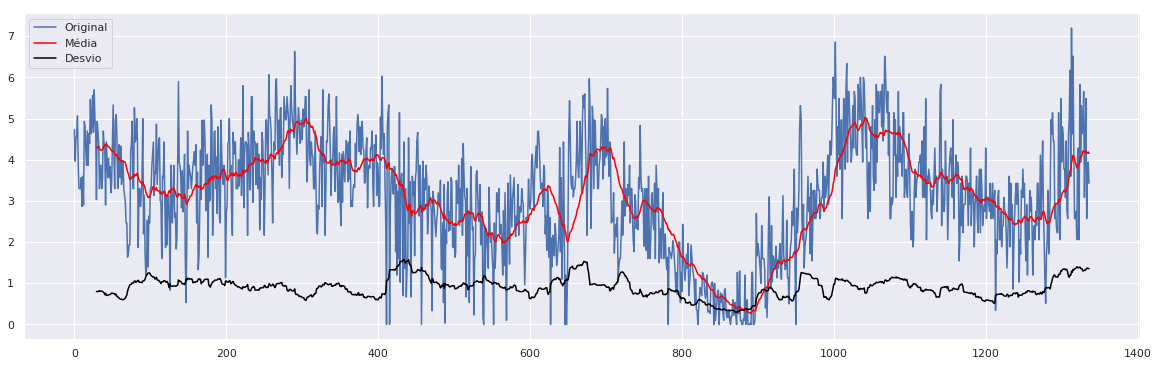

In [60]:
m_m2 = y2.rolling(window=30).mean()
m_std2 = y2.rolling(window=30).std() 

orig2 = plt.plot(y2,label='Original')
mean2 = plt.plot(m_m2, color='red',label='Média')
std2 = plt.plot(m_std2, color='black',label='Desvio')
plt.legend(loc='upper left')
plt.show()



### Trend estimation

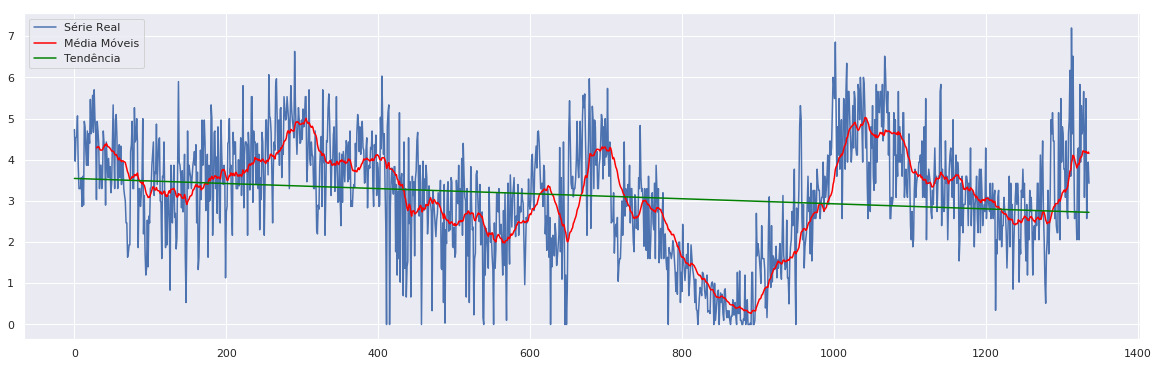

In [61]:
X2 = [i for i in range(0, len(y2))]
X2 = np.reshape(X2, (len(X2), 1))
modelo2 = LinearRegression()
modelo2.fit(X2, y2)

tendencia2 = modelo2.predict(X2)

rolling2 = y2.rolling(window=30)
media_mov2 = rolling2.mean()
plt.plot(y2, label='Série Real')
plt.plot(media_mov2,color='red', label='Média Móveis')
plt.plot(tendencia2,color='green', label='Tendência' )
plt.legend(loc='best')
plt.show()